In [325]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)
library(viridis)
library(microbiome)
library(forcats)

In [334]:
#vips = read.csv("/home/holutz/1_jupyter_notebooks/1_Viperins/EMP/EMP_viperin_blast_w_meta.csv")
vips = read.csv("/home/holutz/1_jupyter_notebooks/1_Viperins/EMP/EMP_blast_w_meta_counts.csv")

In [357]:
counts = setDT(vips)[, .(count = uniqueN(sseqid)), by = SampleID]
vips.sub = vips %>%
    select(SampleID,sample_type,empo_0,empo_1,empo_2,empo_3,host_common_name,host_taxid,host_scientific_name,Host_Phylum,Host_Order,Host_Class,Host_Family,Host_Genus,taxname,
           read_count_shotgun_r1.y,read_count_shotgun_woltka_uniq,read_count_shotgun_rep200,
          alpha_wol_min3450_richness,alpha_wol_min3450_shannon,alpha_wol_min3450_faithspd,alpha_wol_rar3450_richness,alpha_wol_rar3450_shannon,alpha_wol_rar3450_faithspd,
           alpha_wol_rar10k_richness,alpha_wol_rar10k_shannon,alpha_wol_rar10k_faithspd,alpha_wol_min10k_richness,alpha_wol_min10k_shannon,alpha_wol_min10k_faithspd)
vips.sub = unique(vips.sub)
vips.counts = left_join(counts,vips.sub,by="SampleID")

In [358]:
vips.sort = vips.counts %>%
mutate(sort = empo_2)

vips.sort$sort = as.character(vips.sort$sort)
vips.sort$sort[which(vips.sort$empo_2 == "Plant")] = "001_Plant"
vips.sort$sort[which(vips.sort$empo_2 == "Animal")] = "002_Animal"
vips.sort$sort[which(vips.sort$empo_2 == "Fungus")] = "003_Fungus"
vips.sort$sort[which(vips.sort$empo_2 == "Saline")] = "004_Saline"
vips.sort$sort[which(vips.sort$empo_2 == "Non-saline")] = "005_Non-saline"
vips.sort$sort = as.factor(vips.sort$sort)
head(vips.sort$sort)


vips.sort2 = mutate(vips.sort,
   sort2 = paste(sort, SampleID, sep = '_'))

[1] 002_Animal     002_Animal     004_Saline     004_Saline     005_Non-saline
[6] 005_Non-saline
Levels: 001_Plant 002_Animal 003_Fungus 004_Saline 005_Non-saline

In [392]:
vips.biom = import_biom("/home/holutz/1_jupyter_notebooks/1_Viperins/EMP/viperins_emp.biom")
vips.meta = import_qiime_sample_data("/home/holutz/1_jupyter_notebooks/1_Viperins/EMP/EMP_viperin_w_meta.txt")

vips.ps = merge_phyloseq(vips.biom,vips.meta)

Warning message in strsplit(conditionMessage(e), "\n"):
“input string 1 is invalid in this locale”
Warning message in h5checktypeOrOpenLoc(file, readonly = TRUE, native = native):
“An open HDF5 file handle exists. If the file has changed on disk meanwhile, the function may not work properly. Run 'h5closeAll()' to close all open HDF5 object handles.”


ERROR: Error in read_biom(biom_file = BIOMfilename): Both attempts to read input file:
/home/holutz/1_jupyter_notebooks/1_Viperins/EMP/viperins_emp.biom
either as JSON (BIOM-v1) or HDF5 (BIOM-v2).
Check file path, file name, file itself, then try again.


In [386]:
head(vips.tsv)

,OTUID,X13114.angenent.65.s001,X13114.angenent.65.s002,X13114.angenent.65.s003,X13114.angenent.65.s004,X13114.angenent.65.s005,X13114.angenent.65.s006,X13114.angenent.65.s007,X13114.angenent.65.s008,X13114.angenent.65.s009,⋯,X13114.zaneveld.9.s012,X13114.zaneveld.9.s013,X13114.zaneveld.9.s014,X13114.zaneveld.9.s015,X13114.zaneveld.9.s016,X13114.zaneveld.9.s017,X13114.zaneveld.9.s018,X13114.zaneveld.9.s020,X13114.zaneveld.9.s021,X13114.zaneveld.9.s022
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Achromobacter_spanius_CGMCC9173_IMGGENOMEID_2654587547,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,Acidiphilium_multivorum_AIU301_IMGGENOMEID_650716002,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,Acidithiobacillus_thiooxidans_Licanantay_IMGGENOMEID_2609460164,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,Acinetobacter_parvus_NIPH_1103_IMGGENOMEID_2565956643,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,1,2,0,0
5,Acinetobacter_sp._COS3_IMGGENOMEID_2740892190,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,Acinetobacter_sp._MDS7A_IMGGENOMEID_2547132187,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 12 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”


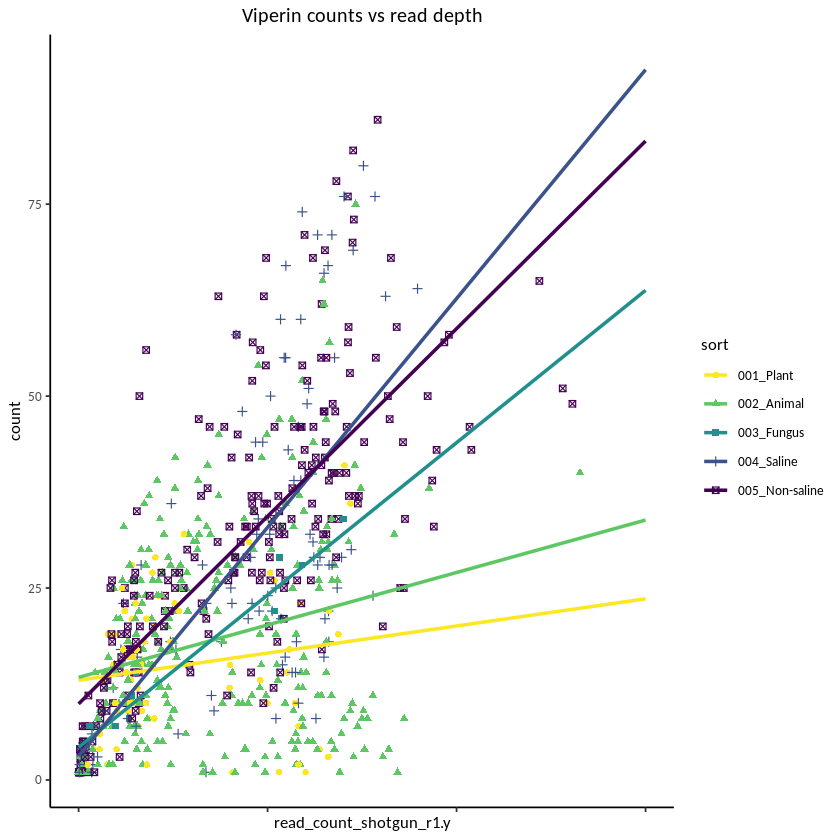

In [395]:
p = ggplot(vips.sort, aes(x=read_count_shotgun_r1.y, y=count, color=sort, shape=sort)) +
  geom_point() + geom_smooth(method=lm, se=FALSE, fullrange=TRUE) + theme_classic() + ggtitle("Viperin counts vs read depth")
p = p + scale_x_continuous(limit=c(0,3e7))
p = p + scale_color_viridis(option="viridis", discrete=TRUE, direction=-1)
p = p + theme(text=element_text(size=10, color="black",family="Calibri"),
                           #legend.key = element_blank(),
                           axis.text.x = element_blank(),
                           #axis.text.x = element_text(angle = 60, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "right",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank())#,
                           #panel.grid.minor = element_blank())

p

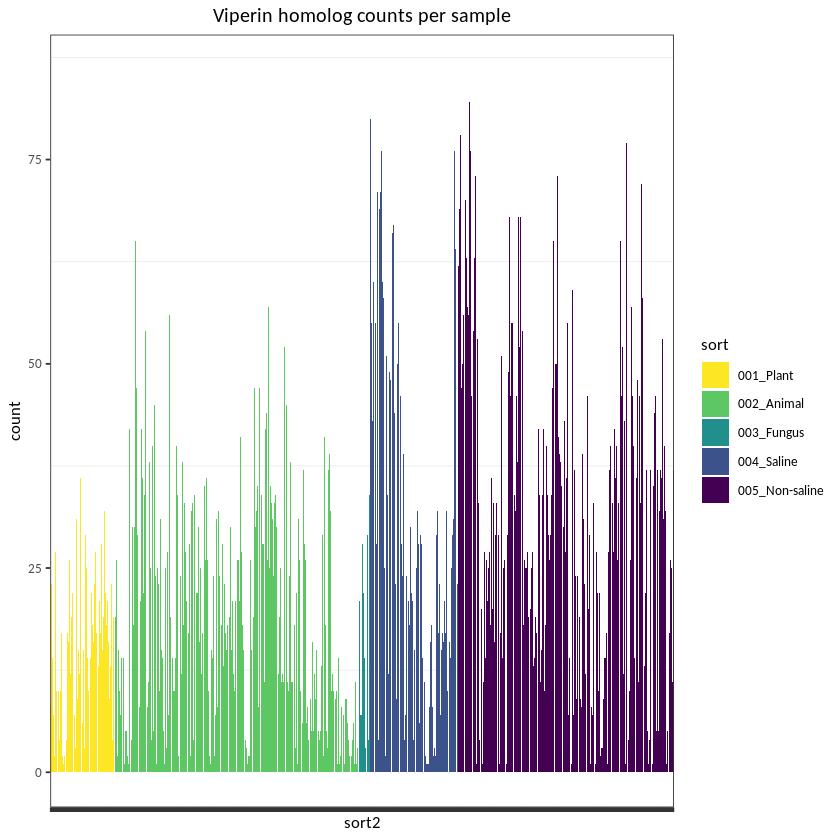

In [337]:
p = ggplot(vips.sort2, aes(x=sort2, y=count, fill=sort)) +
    geom_bar(stat = "identity") +
    ggtitle("Viperin homolog counts per sample")

#geom_point(size=2, shape=16, alpha = .8)

p = p + scale_fill_viridis(option="viridis", discrete=TRUE, direction=-1)

p = p + theme_bw() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           #legend.key = element_blank(),
                           axis.text.x = element_blank(),
                           #axis.text.x = element_text(angle = 60, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "right",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank())#,
                           #panel.grid.minor = element_blank())

#p = p + facet_wrap(~empo_1)

p

#png('/home/holutz/1_jupyter_notebooks/1_Viperins/EMP/Plots/counts_by_empo2.bar.png', width=12, height=8, units='in', res=500)
#plot(p)
#dev.off()

png 
  2

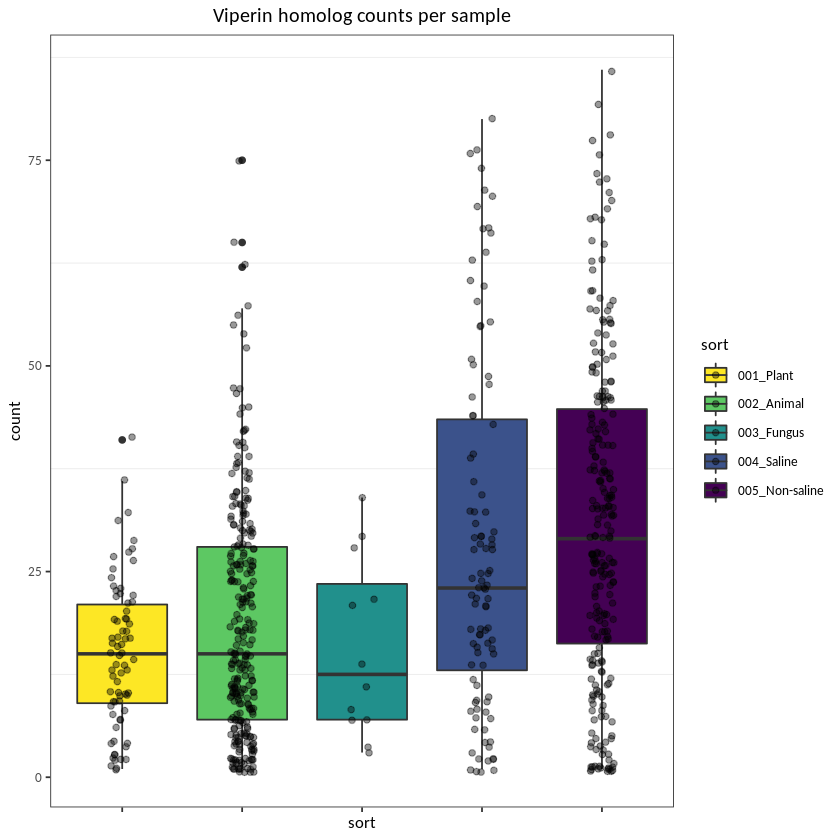

In [330]:
p = ggplot(vips.sort, aes(x=sort, y=count, fill=sort)) +
    geom_boxplot() +
    ggtitle("Viperin homolog counts per sample")

#p = p + geom_point(size=2, shape=16, alpha = .1,color="grey") + 

p = p + geom_jitter(position=position_jitter(0.1),alpha=.4)


#p = ggplot(na.omit(dfobs), aes(x = SampleType, y = Observed)) + ggtitle("Observed Diversity - 10k Rarefied")

#p = p + geom_boxplot() + ylab("# of Observed OTUs")


p = p + scale_fill_viridis(option="viridis", discrete=TRUE, direction=-1)

p = p + theme_bw() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           #legend.key = element_blank(),
                           axis.text.x = element_blank(),
                           #axis.text.x = element_text(angle = 60, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "right",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank())#,
                           #panel.grid.minor = element_blank())

#p = p + facet_wrap(~empo_1)

p

png('/home/holutz/1_jupyter_notebooks/1_Viperins/EMP/Plots/counts_by_empo2.box.png', width=12, height=8, units='in', res=500)
plot(p)
dev.off()

png 
  2

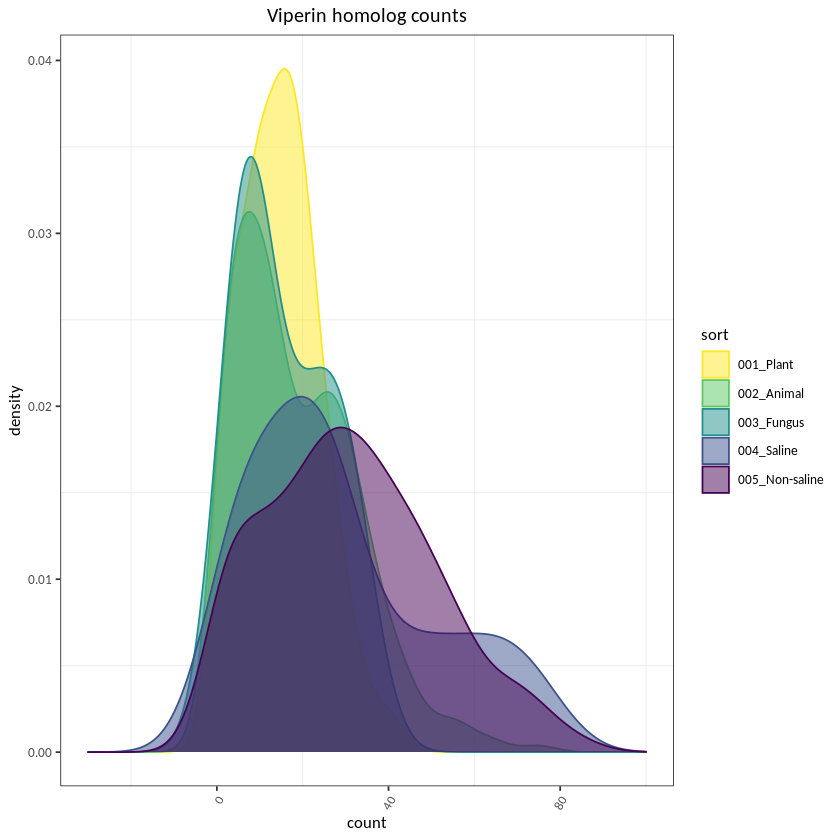

In [331]:
p = ggdensity(vips.sort2, x = "count", color = "sort", fill = "sort", rug=FALSE) +
    ggtitle("Viperin homolog counts") 

#p = ggplot(vips.sort2, aes(x=sort, y=count, fill=empo_2)) +
#    geom_bar(stat = "identity") +
#    ggtitle("Viperin homolog counts per sample")

#geom_point(size=2, shape=16, alpha = .8)

p = p + scale_color_viridis(option="viridis", discrete=TRUE, direction=-1)
p = p + scale_fill_viridis(option="viridis", discrete=TRUE, direction=-1)
p = p + scale_x_continuous(limits = c(-30, 100))

p = p + theme_bw() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           #legend.key = element_blank(),
                           #axis.text.x = element_blank(),
                           axis.text.x = element_text(angle = 60, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "right",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank())#,
                           #panel.grid.minor = element_blank())

#p = p + facet_wrap(~empo_1)

p

png('/home/holutz/1_jupyter_notebooks/1_Viperins/EMP/Plots/counts_by_empo2.bar.png', width=12, height=8, units='in', res=500)
plot(p)
dev.off()

png 
  2

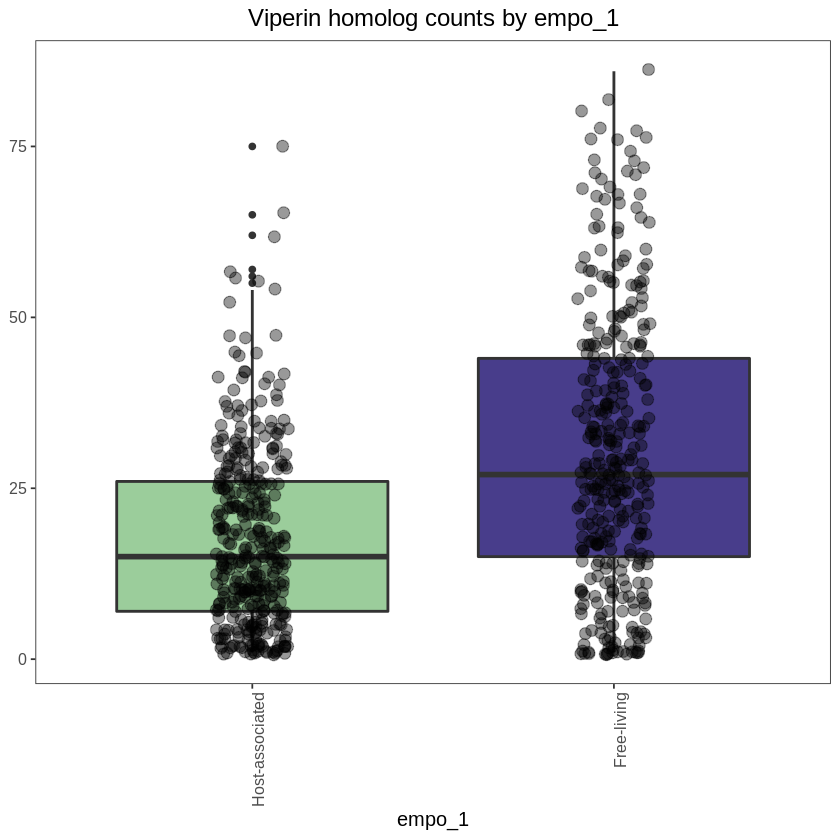

In [332]:
## Sort by mean

avg_obs <- aggregate(count ~ empo_1, data = vips.counts, mean)
vips.counts$empo_1 <-factor(vips.counts$empo_1, levels=avg_obs[order(avg_obs$count), "empo_1"])


p = ggplot(vips.counts, aes(x=empo_1, y=count, fill=empo_1)) +
    ggtitle("Viperin homolog counts by empo_1")

p = p + geom_boxplot(lwd=.8) + ylab("empo_1") #+ coord_flip()
p = p + geom_point(position=position_jitter(width=0.1),size = 3, alpha=0.4,
                   aes(group=empo_1))

#p = p + scale_fill_viridis(option="viridis", discrete=TRUE, direction=-1) 

p = p + scale_fill_manual(values = c("darkseagreen3","darkslateblue"))

p = p + theme_bw() + theme(text=element_text(size=12, color="black",family="Arial"),
                           legend.key = element_blank(),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "none",
                           axis.title.y=element_blank(),
                           axis.text.x = element_text(angle = 90, hjust = 1),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())


p


png('/home/holutz/1_jupyter_notebooks/1_Viperins/EMP/Plots/counts_by_empo_1.box.png', width=8, height=8, units='in', res=500)
plot(p)
dev.off()


In [251]:
kruskal.test(count~empo_1, data=vips.counts)
#dunn.test(vips.counts$count, vips.counts$empo_2, method = "Bonferroni")


	Kruskal-Wallis rank sum test

data:  count by empo_1
Kruskal-Wallis chi-squared = 91.362, df = 1, p-value < 2.2e-16


#### EMP Animal Exploration

In [338]:
vips.animal = subset(vips.sort2, empo_2=="Animal")
head(vips.animal$Host_Order)

[1] Dictyoceratida Otidiformes    Scopalinida    Artiodactyla   Rodentia      
[6] Rodentia      
45 Levels: Accipitriformes Afrosoricida Anseriformes Anura ... Verongimorpha

png 
  2

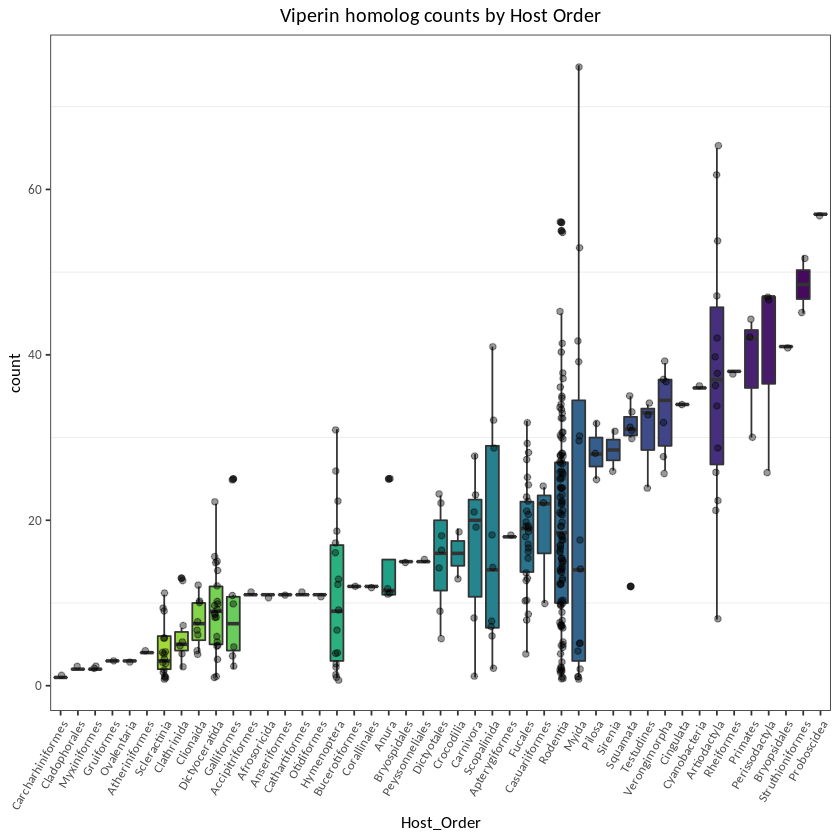

In [351]:
avg_obs <- aggregate(count ~ Host_Order, data = vips.sort, mean)
vips.sort$Host_Order <-factor(vips.sort$Host_Order, levels=avg_obs[order(avg_obs$count), "Host_Order"])


p = ggplot(na.omit(vips.sort), aes(x=Host_Order, y=count, fill=Host_Order)) +
    geom_boxplot() +
    ggtitle("Viperin homolog counts by Host Order")

#p = p + geom_point(size=2, shape=16, alpha = .1,color="grey") + 

p = p + geom_jitter(position=position_jitter(0.1),alpha=.4)


#p = ggplot(na.omit(dfobs), aes(x = SampleType, y = Observed)) + ggtitle("Observed Diversity - 10k Rarefied")

#p = p + geom_boxplot() + ylab("# of Observed OTUs")


p = p + scale_fill_viridis(option="viridis", discrete=TRUE, direction=-1)

p = p + theme_bw() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           #legend.key = element_blank(),
                           #axis.text.x = element_blank(),
                           axis.text.x = element_text(angle = 60, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "none",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank())#,
                           #panel.grid.minor = element_blank())

#p = p + facet_wrap(~empo_1)

p

png('/home/holutz/1_jupyter_notebooks/1_Viperins/EMP/Plots/counts_by_HostOrder.box.png', width=12, height=8, units='in', res=500)
plot(p)
dev.off()

### American Gut Project

In [317]:
apg = read.csv("/home/holutz/1_jupyter_notebooks/1_Viperins/AGP_viperin_blast_w_meta.csv")

In [318]:
counts = setDT(apg)[, .(count = uniqueN(sseqid)), by = forward_read]
apg.sub = apg %>%
    select(forward_read,dog,age_years,age_corrected,age_cat,library_construction_protocol,alcohol_consumption,csection,sex,diet,diet_type,bowel_movement_frequency)
apg.sub = unique(apg.sub)
apg.counts = left_join(counts,apg.sub,by="forward_read")

In [319]:
head(apg.counts$age_cat)

[1] 70+ 40s 60s 40s 60s 30s
Levels: 20s 30s 40s 50s 60s 70+ teen

In [320]:
apg.sort = apg.counts %>%
mutate(age_cat.num = age_cat)

apg.sort$age_cat.num = as.character(apg.sort$age_cat.num)
apg.sort$age_cat.num[which(apg.sort$age_cat == "teen")] = "1"
apg.sort$age_cat.num[which(apg.sort$age_cat == "20s")] = "2"
apg.sort$age_cat.num[which(apg.sort$age_cat == "30s")] = "3"
apg.sort$age_cat.num[which(apg.sort$age_cat == "40s")] = "4"
apg.sort$age_cat.num[which(apg.sort$age_cat == "50s")] = "5"
apg.sort$age_cat.num[which(apg.sort$age_cat == "60s")] = "6"
apg.sort$age_cat.num[which(apg.sort$age_cat == "70+")] = "7"
apg.sort$age_cat.num = as.factor(apg.sort$age_cat.num)
head(as.numeric(apg.sort$age_cat.num))

[1] 7 4 6 4 6 3

In [314]:
head(as.factor(apg.counts$age_cat.num))

factor(0)
Levels:

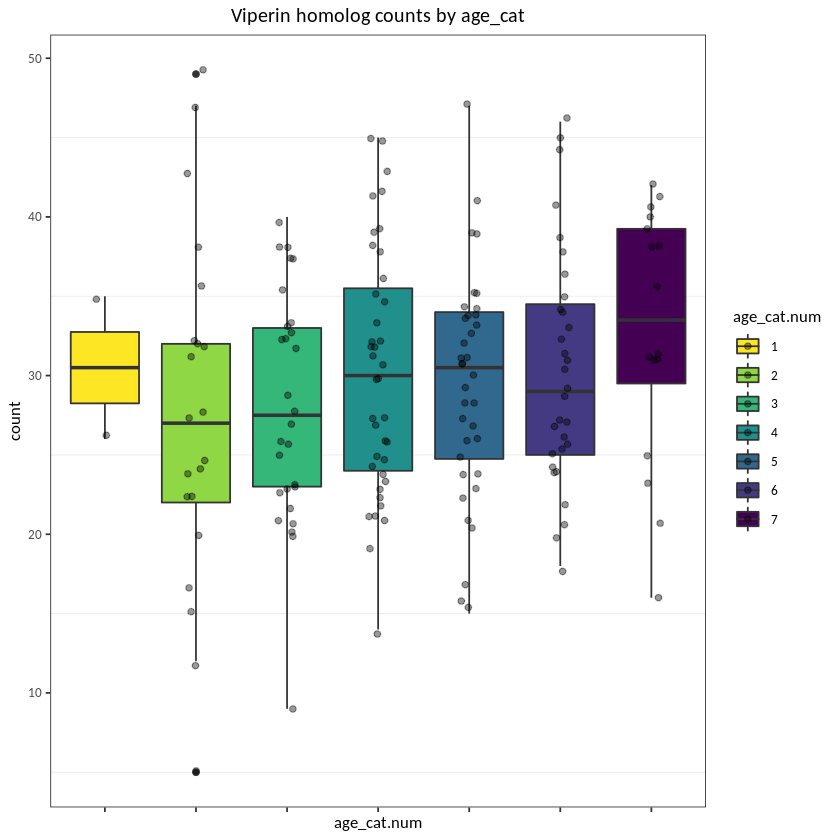

In [321]:
p = ggplot(apg.sort, aes(x=age_cat.num, y=count, fill=age_cat.num)) +
    geom_boxplot() +
    ggtitle("Viperin homolog counts by age_cat")

#p = p + geom_point(size=2, shape=16, alpha = .1,color="grey") + 

p = p + geom_jitter(position=position_jitter(0.1),alpha=.4)


#p = ggplot(na.omit(dfobs), aes(x = SampleType, y = Observed)) + ggtitle("Observed Diversity - 10k Rarefied")

#p = p + geom_boxplot() + ylab("# of Observed OTUs")


p = p + scale_fill_viridis(option="viridis", discrete=TRUE, direction=-1)

p = p + theme_bw() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           #legend.key = element_blank(),
                           axis.text.x = element_blank(),
                           #axis.text.x = element_text(angle = 60, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "right",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank())#,
                           #panel.grid.minor = element_blank())

#p = p + facet_wrap(~empo_1)

p

#png('/home/holutz/1_jupyter_notebooks/1_Viperins/counts_by_empo2.box.png', width=12, height=8, units='in', res=500)
#plot(p)
#dev.off()

`geom_smooth()` using formula 'y ~ x'



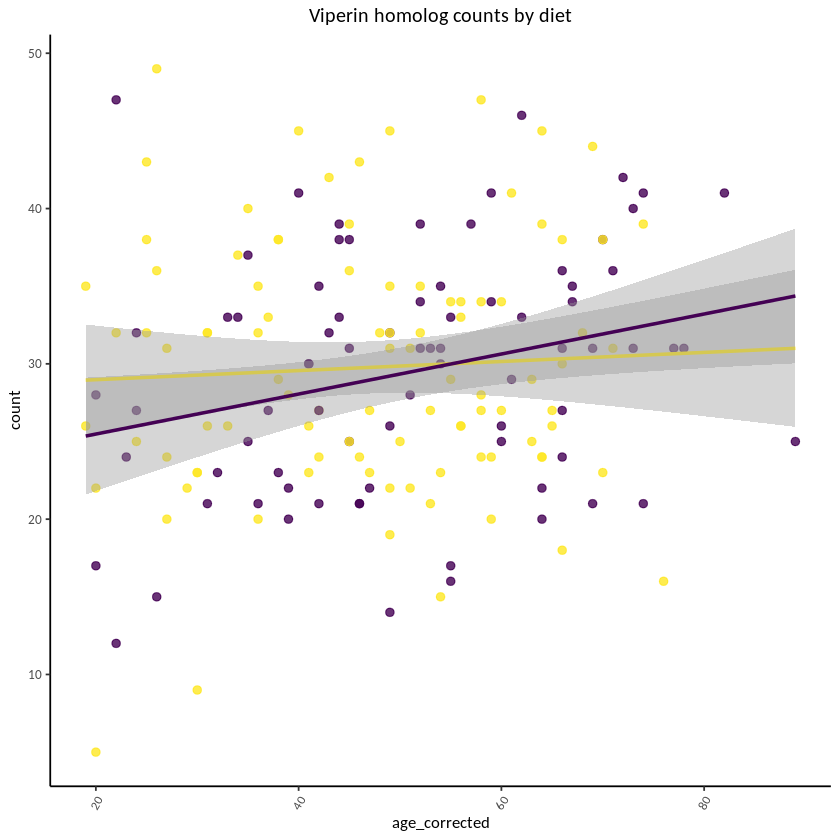

In [322]:
p = ggplot(apg.sort, aes(x=age_corrected, y=count, color=sex)) +
    geom_point(size=2,alpha=.8) + geom_smooth(method=lm, se=TRUE, fullrange=TRUE) +
    ggtitle("Viperin homolog counts by diet")


#geom_point(size=2, shape=16, alpha = .8)

p = p + scale_color_viridis(option="viridis", discrete=TRUE, direction=-1)

#p = p + scale_color_grey()

p = p + theme_classic() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           #legend.key = element_blank(),
                           #axis.text.x = element_blank(),
                           axis.text.x = element_text(angle = 60, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "none",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank())#,
                           #panel.grid.minor = element_blank())

#p = p + facet_wrap(~diet_type)

p

#png('/home/holutz/1_jupyter_notebooks/1_Viperins/apg.diet_type.facet.regression.png', width=6, height=6, units='in', res=500)
#plot(p)
#dev.off()

In [323]:
fit = lm(age_corrected ~ count, data = apg.counts)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
count,1,923.538,923.5380,3.850114,0.05136552
Residuals,171,41018.266,239.8729,NA,NA



Call:
lm(formula = age_corrected ~ count, data = apg.counts)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.793 -12.413   0.527  12.007  41.587 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  40.1631     4.5354   8.855 1.03e-15 ***
count         0.2900     0.1478   1.962   0.0514 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.49 on 171 degrees of freedom
Multiple R-squared:  0.02202,	Adjusted R-squared:  0.0163 
F-statistic:  3.85 on 1 and 171 DF,  p-value: 0.05137



	Kruskal-Wallis rank sum test

data:  count by sex
Kruskal-Wallis chi-squared = 0.045697, df = 1, p-value = 0.8307


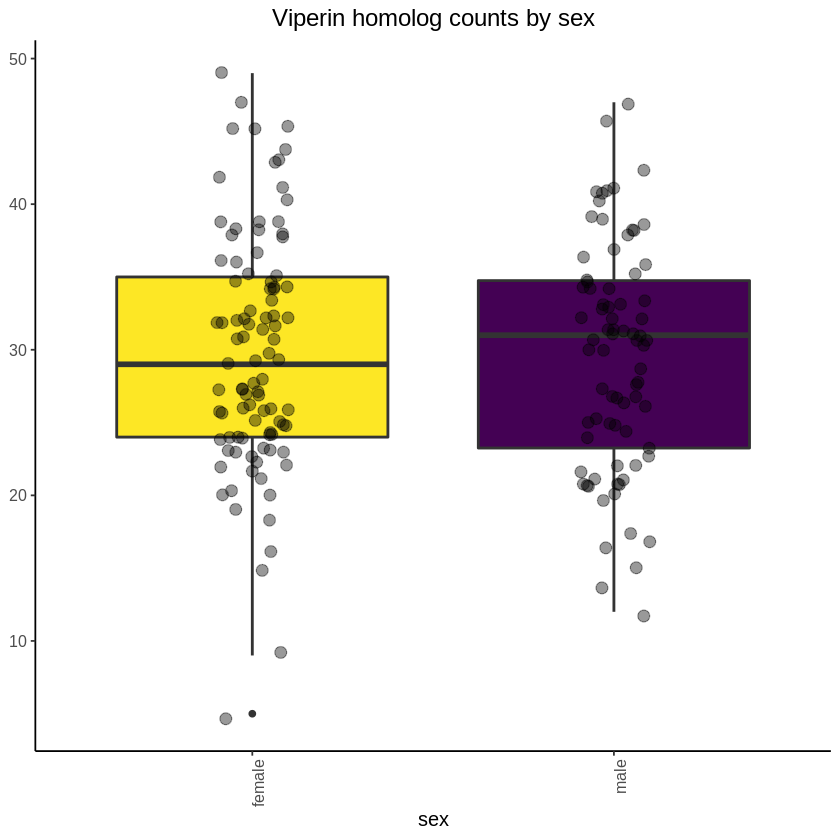

In [324]:
## Sort by mean

#avg_obs <- aggregate(count ~ empo_1, data = vips.counts, mean)
#vips.counts$empo_1 <-factor(vips.counts$empo_1, levels=avg_obs[order(avg_obs$count), "empo_1"])
#apg.counts$dog = as.character(apg.counts$dog)
#apg.counts$dog[which(apg.counts$dog == "TRUE")] = "Yes"
#apg.counts$dog[which(apg.counts$dog == "FALSE")] = "No"

p = ggplot(apg.counts, aes(x=sex, y=count, fill=sex)) +
    ggtitle("Viperin homolog counts by sex")

p = p + geom_boxplot(lwd=.8) + ylab("sex") #+ coord_flip()
p = p + geom_point(position=position_jitter(width=0.1),size = 3, alpha=0.4,
                   aes(group=sex))

p = p + scale_fill_viridis(option="viridis", discrete=TRUE, direction=-1) 
#p = p + scale_fill_manual(values = c("darkseagreen3","darkslateblue"))


p = p + theme_classic() + theme(text=element_text(size=12, color="black",family="Arial"),
                           legend.key = element_blank(),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "none",
                           axis.title.y=element_blank(),
                           axis.text.x = element_text(angle = 90, hjust = 1),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())


p


#png('/home/holutz/1_jupyter_notebooks/1_Viperins/counts_by_empo_1.box.png', width=8, height=8, units='in', res=500)
#plot(p)
#dev.off()

kruskal.test(count~sex, data=apg.counts)

